In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.stats as stats 
import warnings 
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report
from sklearn.metrics import precision_recall_fscore_support as score
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.decomposition import PCA

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Proyecto Innovación 1/Metodología/Datos/df_kmeans_cluster.csv")

In [ ]:
data.sample(3)

,RUT,montoTotal,cantidadTransacciones,comisionNeta,comisionIVA,porcentajeComision,codSII,MCC,debito,credito,has_hes,planTUU,fechaCompra,compra_inicio,compra_fin,certifDuration,timeasclient_compra,timeasclient_certificado,time,cluster_km
904,771500870,205100.0,5.0,2399.0,456.0,1.17,463019.0,OTRAS TIENDAS DE ALIMENTOS,1.0,0.0,0.0,Plan Tuu,2022-05-23,0.0,1.0,1.0,9.0,9.0,86 days 02:43:51.426851,2
899,771245668,2102300.0,448.0,27377.0,5208.0,1.70,472101.0,SUPERMERCADOS,3.0,2.0,0.0,Simple,2020-11-26,11.0,17.0,6.0,552.0,552.0,629 days 02:43:51.426851,4
23,104375472,41067210.0,4310.0,537044.0,102106.0,1.90,477203.0,PERFUMERIAS,5.0,5.0,1.0,Plan Tuu,2021-01-14,25.0,42.0,17.0,503.0,503.0,580 days 02:43:51.426851,5


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1690 entries, 0 to 1689
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   RUT                       1690 non-null   object 
 1   montoTotal                1690 non-null   float64
 2   cantidadTransacciones     1690 non-null   float64
 3   comisionNeta              1690 non-null   float64
 4   comisionIVA               1690 non-null   float64
 5   porcentajeComision        1690 non-null   float64
 6   codSII                    1690 non-null   float64
 7   MCC                       1637 non-null   object 
 8   debito                    1690 non-null   float64
 9   credito                   1690 non-null   float64
 10  has_hes                   1690 non-null   float64
 11  planTUU                   1690 non-null   object 
 12  fechaCompra               1690 non-null   object 
 13  compra_inicio             1690 non-null   float64
 14  compra_f

In [ ]:
data.describe()

,montoTotal,cantidadTransacciones,comisionNeta,comisionIVA,porcentajeComision,codSII,debito,credito,has_hes,compra_inicio,compra_fin,certifDuration,timeasclient_compra,timeasclient_certificado,cluster_km
count,1.690000e+03,1690.000000,1690.000000,1690.000000,1690.000000,1690.000000,1690.000000,1690.000000,1690.000000,1690.000000,1690.000000,1690.000000,1690.000000,1690.000000,1690.000000
mean,5.324607e+06,537.134911,70927.437278,13479.872781,1.588757,491408.748521,3.350888,2.258580,0.253254,9.715976,25.718343,16.002367,202.675148,202.675148,2.468639
std,8.406499e+06,894.527291,113156.812249,21502.878352,0.262657,177626.347975,1.884926,1.998223,0.435004,15.748949,31.371171,25.836806,163.904221,163.904221,1.987653
min,1.000000e+02,1.000000,0.000000,0.000000,0.130000,11901.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,5.000000,0.000000
25%,4.382500e+05,33.000000,5734.000000,1087.500000,1.340000,472101.000000,2.000000,1.000000,0.000000,1.000000,9.000000,4.000000,80.250000,80.250000,1.000000
50%,2.125765e+06,174.500000,27220.500000,5183.500000,1.660000,472200.000000,3.000000,2.000000,0.000000,5.000000,16.000000,8.000000,161.000000,161.000000,2.000000
75%,6.255732e+06,624.250000,85157.250000,16219.250000,1.790000,522120.000000,5.000000,4.000000,1.000000,12.000000,30.000000,17.000000,243.000000,243.000000,4.000000
max,6.532670e+07,6631.000000,899980.000000,171058.000000,2.510000,960909.000000,20.000000,16.000000,1.000000,152.000000,529.000000,404.000000,674.000000,674.000000,6.000000


In [ ]:
data.describe(include = "object")

,RUT,MCC,planTUU,fechaCompra,time
count,1690,1637,1690,1690,1690
unique,1690,78,4,426,426
top,10018933K,SUPERMERCADOS,Plan Tuu,2022-01-10,219 days 02:43:51.426851
freq,1,353,1651,17,17


In [ ]:
data.cluster_km.value_counts()

2    598
0    420
4    266
6    242
3     82
1     49
5     33
Name: cluster_km, dtype: int64

In [ ]:
import matplotlib
matplotlib.rcParams['figure.figsize'] =[8,8]
matplotlib.rcParams.update({'font.size': 15})

In [ ]:
data_label = data.copy()

In [ ]:
data_label.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1690 entries, 0 to 1689
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   RUT                       1690 non-null   object 
 1   montoTotal                1690 non-null   float64
 2   cantidadTransacciones     1690 non-null   float64
 3   comisionNeta              1690 non-null   float64
 4   comisionIVA               1690 non-null   float64
 5   porcentajeComision        1690 non-null   float64
 6   codSII                    1690 non-null   float64
 7   MCC                       1637 non-null   object 
 8   debito                    1690 non-null   float64
 9   credito                   1690 non-null   float64
 10  has_hes                   1690 non-null   float64
 11  planTUU                   1690 non-null   object 
 12  fechaCompra               1690 non-null   object 
 13  compra_inicio             1690 non-null   float64
 14  compra_f

In [ ]:
data_label["cluster_km"] = data_label["cluster_km"].apply(str)

In [ ]:
data_label["cluster_km"] = data_label["cluster_km"].str.replace("0","Cluster 0")
data_label["cluster_km"] = data_label["cluster_km"].str.replace("1","Cluster 1")
data_label["cluster_km"] = data_label["cluster_km"].str.replace("2","Cluster 2")
data_label["cluster_km"] = data_label["cluster_km"].str.replace("3","Cluster 3")
data_label["cluster_km"] = data_label["cluster_km"].str.replace("4","Cluster 4")
data_label["cluster_km"] = data_label["cluster_km"].str.replace("5","Cluster 5")
data_label["cluster_km"] = data_label["cluster_km"].str.replace("6","Cluster 6")

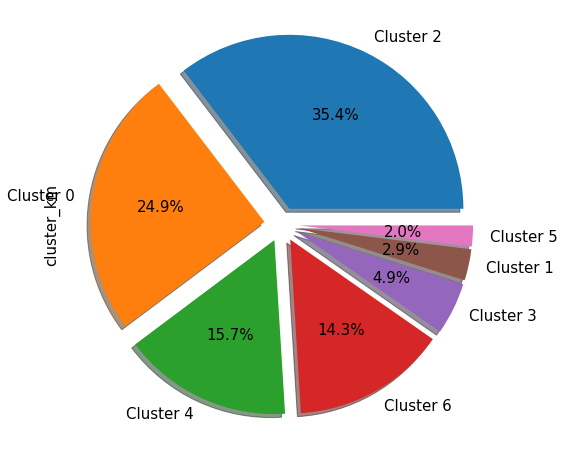

In [ ]:
data_label['cluster_km'].value_counts().plot.pie(explode = [0.1,0.1,0.1,0.1,0.1,0.1,0.1], autopct = "%1.1f%%", shadow=True, figsize=(10,8))
plt.show()

In [ ]:
def Binarizer(df, col):
    dummy = pd.get_dummies(df[col].str.get_dummies(sep=','), drop_first=True)
    df = df.drop(col, axis = 1) 
    df = pd.concat([df, dummy], axis=1)
    return df

### División de la muestra : Conjunto entrenamiento y conjunto de pruebas

In [ ]:
data_label = Binarizer(data_label, "MCC")
data_label = Binarizer(data_label, "planTUU")

In [ ]:
data_label.drop(columns = ["RUT", "fechaCompra", "time"], inplace = True)

In [ ]:
X = data_label.drop(columns='cluster_km')
y = data_label['cluster_km']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 1232)

In [ ]:
num_cols = data_label.drop(columns = "cluster_km").select_dtypes([np.number]).columns
df_std = pd.DataFrame(StandardScaler().fit_transform(data_label[num_cols].astype('float64')),columns=num_cols)

In [ ]:
scaler= StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

## **Modelamiento Vanila**


### **Logistic Regression**




In [ ]:
model_lr = LogisticRegression(random_state=1234)
model_lr.fit(X_train,y_train)
acc_logreg = model_lr.score(X_test,y_test)
print("Accuracy :",acc_logreg)

Accuracy : 0.9068100358422939


In [ ]:
y_hat_lr= model_lr.predict(X_test)
lr_precision = precision_score(y_test, y_hat_lr, average="micro")
lr_recall = recall_score(y_test, y_hat_lr, average = "micro") 
lr_f1 = f1_score(y_test, y_hat_lr, average = "micro")
#lr_roc = roc_auc_score(y_test, y_hat_lr)
print("Precision : ", lr_precision, "\nRecall : ", lr_recall, "\nF1-Score : ", lr_f1)

Precision :  0.9068100358422939 
Recall :  0.9068100358422939 
F1-Score :  0.9068100358422939


In [ ]:
print(classification_report(y_test,y_hat_lr))

              precision    recall  f1-score   support

   Cluster 0       0.89      0.87      0.88       143
   Cluster 1       0.55      0.67      0.60         9
   Cluster 2       0.94      0.95      0.95       198
   Cluster 3       0.89      0.89      0.89        28
   Cluster 4       0.96      0.95      0.95        91
   Cluster 5       0.67      1.00      0.80         4
   Cluster 6       0.88      0.85      0.86        85

    accuracy                           0.91       558
   macro avg       0.82      0.88      0.85       558
weighted avg       0.91      0.91      0.91       558



### **KNN**


In [ ]:
knn_model = KNeighborsClassifier() 
knn_model.fit(X_train,y_train)
knn_predicted_y = knn_model.predict(X_test)
accuracy_knn = knn_model.score(X_test,y_test)
print("KNN accuracy:",accuracy_knn)

KNN accuracy: 0.6881720430107527


In [ ]:
y_hat_knn= knn_model.predict(X_test)
knn_precision = precision_score(y_test, y_hat_knn, average="micro")
knn_recall = recall_score(y_test, y_hat_knn, average = "micro") 
knn_f1 = f1_score(y_test, y_hat_knn, average = "micro")
#lr_roc = roc_auc_score(y_test, y_hat_lr)
print("Precision : ", knn_precision, "\nRecall : ", knn_recall, "\nF1-Score : ", knn_f1)

Precision :  0.6881720430107527 
Recall :  0.6881720430107527 
F1-Score :  0.6881720430107527


In [ ]:
print(classification_report(y_test,y_hat_knn))

              precision    recall  f1-score   support

   Cluster 0       0.59      0.60      0.60       143
   Cluster 1       0.40      0.22      0.29         9
   Cluster 2       0.70      0.86      0.77       198
   Cluster 3       0.76      0.57      0.65        28
   Cluster 4       0.83      0.77      0.80        91
   Cluster 5       0.38      0.75      0.50         4
   Cluster 6       0.72      0.42      0.53        85

    accuracy                           0.69       558
   macro avg       0.63      0.60      0.59       558
weighted avg       0.69      0.69      0.68       558



### **Support Vector Classification**

In [ ]:
svc_model = SVC(random_state = 1232)
svc_model.fit(X_train,y_train)
svc_predict_y = svc_model.predict(X_test)
accuracy_svc = svc_model.score(X_test,y_test)
print("Accuracy :",accuracy_svc)

Accuracy : 0.7903225806451613


In [ ]:
y_hat_svc= svc_model.predict(X_test)
svc_precision = precision_score(y_test, y_hat_svc, average="micro")
svc_recall = recall_score(y_test, y_hat_svc, average = "micro") 
svc_f1 = f1_score(y_test, y_hat_svc, average = "micro")
#lr_roc = roc_auc_score(y_test, y_hat_lr)
print("Precision : ", svc_precision, "\nRecall : ", svc_recall, "\nF1-Score : ", svc_f1)

Precision :  0.7903225806451613 
Recall :  0.7903225806451613 
F1-Score :  0.7903225806451614


In [ ]:
print(classification_report(y_test,y_hat_svc))

              precision    recall  f1-score   support

   Cluster 0       0.76      0.77      0.76       143
   Cluster 1       1.00      0.44      0.62         9
   Cluster 2       0.76      0.91      0.83       198
   Cluster 3       1.00      0.64      0.78        28
   Cluster 4       0.87      0.82      0.85        91
   Cluster 5       0.80      1.00      0.89         4
   Cluster 6       0.79      0.58      0.67        85

    accuracy                           0.79       558
   macro avg       0.85      0.74      0.77       558
weighted avg       0.80      0.79      0.79       558



### **Decision Tree Classifier**

In [ ]:
dt_model = DecisionTreeClassifier(random_state=1232)
dt_model.fit(X_train, y_train)
dt_predicted_y = dt_model.predict(X_test)
dt_accuracy = dt_model.score(X_test, y_test)
print("Decision Tree model accuracy :", dt_accuracy)

Decision Tree model accuracy : 0.9551971326164874


In [ ]:
y_hat_dt= dt_model.predict(X_test)
dt_precision = precision_score(y_test, y_hat_dt, average="micro")
dt_recall = recall_score(y_test, y_hat_dt, average = "micro") 
dt_f1 = f1_score(y_test, y_hat_dt, average = "micro")
#lr_roc = roc_auc_score(y_test, y_hat_lr)
print("Precision : ", dt_precision, "\nRecall : ", dt_recall, "\nF1-Score : ", dt_f1)

Precision :  0.9551971326164874 
Recall :  0.9551971326164874 
F1-Score :  0.9551971326164874


In [ ]:
print(classification_report(y_test,y_hat_dt))

              precision    recall  f1-score   support

   Cluster 0       0.94      0.97      0.95       143
   Cluster 1       0.86      0.67      0.75         9
   Cluster 2       0.99      0.96      0.98       198
   Cluster 3       1.00      0.89      0.94        28
   Cluster 4       0.99      0.99      0.99        91
   Cluster 5       0.50      1.00      0.67         4
   Cluster 6       0.91      0.93      0.92        85

    accuracy                           0.96       558
   macro avg       0.88      0.92      0.89       558
weighted avg       0.96      0.96      0.96       558



### **Random Forest**

In [ ]:
rf_model = RandomForestClassifier(random_state=1232)
rf_model.fit(X_train, y_train)
rf_accuracy = rf_model.score(X_test, y_test)
print("Random Forest model accuracy :", rf_accuracy)

Random Forest model accuracy : 0.9390681003584229


In [ ]:
y_hat_rf= rf_model.predict(X_test)
rf_precision = precision_score(y_test, y_hat_rf, average="micro")
rf_recall = recall_score(y_test, y_hat_rf, average = "micro") 
rf_f1 = f1_score(y_test, y_hat_rf, average = "micro")
#lr_roc = roc_auc_score(y_test, y_hat_lr)
print("Precision : ", rf_precision, "\nRecall : ", rf_recall, "\nF1-Score : ", rf_f1)

Precision :  0.9390681003584229 
Recall :  0.9390681003584229 
F1-Score :  0.9390681003584229


In [ ]:
print(classification_report(y_test,y_hat_rf))

              precision    recall  f1-score   support

   Cluster 0       0.95      0.94      0.95       143
   Cluster 1       0.88      0.78      0.82         9
   Cluster 2       0.96      0.96      0.96       198
   Cluster 3       0.95      0.75      0.84        28
   Cluster 4       0.99      0.99      0.99        91
   Cluster 5       0.50      1.00      0.67         4
   Cluster 6       0.85      0.89      0.87        85

    accuracy                           0.94       558
   macro avg       0.87      0.90      0.87       558
weighted avg       0.94      0.94      0.94       558



### **AdaBoost Classifier** 

In [ ]:
adb_model = AdaBoostClassifier(random_state = 1232)
adb_model.fit(X_train, y_train)
adb_accuracy = adb_model.score(X_test, y_test)
print("adb model accuracy :", adb_accuracy)

adb model accuracy : 0.30824372759856633


In [ ]:
y_hat_adb= adb_model.predict(X_test)
adb_precision = precision_score(y_test, y_hat_adb, average="micro")
adb_recall = recall_score(y_test, y_hat_adb, average = "micro") 
adb_f1 = f1_score(y_test, y_hat_adb, average = "micro")
#lr_roc = roc_auc_score(y_test, y_hat_lr)
print("Precision : ", adb_precision, "\nRecall : ", adb_recall, "\nF1-Score : ", adb_f1)

Precision :  0.30824372759856633 
Recall :  0.30824372759856633 
F1-Score :  0.30824372759856633


In [ ]:
print(classification_report(y_test,y_hat_adb))

              precision    recall  f1-score   support

   Cluster 0       0.44      0.93      0.60       143
   Cluster 1       0.00      0.00      0.00         9
   Cluster 2       1.00      0.01      0.01       198
   Cluster 3       0.00      0.00      0.00        28
   Cluster 4       0.00      0.00      0.00        91
   Cluster 5       0.00      0.00      0.00         4
   Cluster 6       0.15      0.45      0.22        85

    accuracy                           0.31       558
   macro avg       0.23      0.20      0.12       558
weighted avg       0.49      0.31      0.19       558



### **Gradient Boosting Classifier**

In [ ]:
gb_model = GradientBoostingClassifier(random_state=1232)
gb_model.fit(X_train, y_train)
gb_accuracy = gb_model.score(X_test, y_test)
print(" model accuracy :", gb_accuracy)

 model accuracy : 0.974910394265233


In [ ]:
y_hat_gb= gb_model.predict(X_test)
gb_precision = precision_score(y_test, y_hat_gb, average="micro")
gb_recall = recall_score(y_test, y_hat_gb, average = "micro") 
gb_f1 = f1_score(y_test, y_hat_gb, average = "micro")
#lr_roc = roc_auc_score(y_test, y_hat_lr)
print("Precision : ", gb_precision, "\nRecall : ", gb_recall, "\nF1-Score : ", gb_f1)

Precision :  0.974910394265233 
Recall :  0.974910394265233 
F1-Score :  0.974910394265233


In [ ]:
print(classification_report(y_test,y_hat_gb))

              precision    recall  f1-score   support

   Cluster 0       0.97      0.96      0.96       143
   Cluster 1       0.89      0.89      0.89         9
   Cluster 2       0.98      0.99      0.99       198
   Cluster 3       0.93      0.96      0.95        28
   Cluster 4       0.99      1.00      0.99        91
   Cluster 5       1.00      1.00      1.00         4
   Cluster 6       0.96      0.95      0.96        85

    accuracy                           0.97       558
   macro avg       0.96      0.96      0.96       558
weighted avg       0.97      0.97      0.97       558



### **XGBoost**

In [ ]:
xgb_model = XGBClassifier(random_state=1232)
xgb_model.fit(X_train, y_train)
xgb_accuracy = xgb_model.score(X_test, y_test)
print(" model accuracy :", xgb_accuracy)

 model accuracy : 0.978494623655914


In [ ]:
y_hat_xgb= xgb_model.predict(X_test)
xgb_precision = precision_score(y_test, y_hat_xgb, average="micro")
xgb_recall = recall_score(y_test, y_hat_xgb, average = "micro") 
xgb_f1 = f1_score(y_test, y_hat_xgb, average = "micro")
#lr_roc = roc_auc_score(y_test, y_hat_lr)
print("Precision : ", xgb_precision, "\nRecall : ", xgb_recall, "\nF1-Score : ", xgb_f1)

Precision :  0.978494623655914 
Recall :  0.978494623655914 
F1-Score :  0.978494623655914


In [ ]:
print(classification_report(y_test,y_hat_xgb))

              precision    recall  f1-score   support

   Cluster 0       0.97      0.97      0.97       143
   Cluster 1       1.00      1.00      1.00         9
   Cluster 2       0.99      0.98      0.99       198
   Cluster 3       0.90      1.00      0.95        28
   Cluster 4       1.00      0.99      0.99        91
   Cluster 5       1.00      1.00      1.00         4
   Cluster 6       0.95      0.95      0.95        85

    accuracy                           0.98       558
   macro avg       0.97      0.99      0.98       558
weighted avg       0.98      0.98      0.98       558



## Linear Discriminant Analysis (LDA)

In [ ]:
lda_model = LDA()
lda_model.fit(X_train, y_train)
lda_accuracy = lda_model.score(X_test, y_test)
print(" model accuracy :", lda_accuracy)

 model accuracy : 0.9068100358422939


In [ ]:
y_hat_lda= lda_model.predict(X_test)
lda_precision = precision_score(y_test, y_hat_lda, average="micro")
lda_recall = recall_score(y_test, y_hat_lda, average = "micro") 
lda_f1 = f1_score(y_test, y_hat_lda, average = "micro")
#lr_roc = roc_auc_score(y_test, y_hat_lr)
print("Precision : ", lda_precision, "\nRecall : ", lda_recall, "\nF1-Score : ", lda_f1)

Precision :  0.9068100358422939 
Recall :  0.9068100358422939 
F1-Score :  0.9068100358422939


In [ ]:
print(classification_report(y_test,y_hat_lda))

              precision    recall  f1-score   support

   Cluster 0       0.88      0.86      0.87       143
   Cluster 1       0.83      0.56      0.67         9
   Cluster 2       0.90      0.95      0.92       198
   Cluster 3       0.96      0.93      0.95        28
   Cluster 4       0.97      0.97      0.97        91
   Cluster 5       0.67      1.00      0.80         4
   Cluster 6       0.92      0.85      0.88        85

    accuracy                           0.91       558
   macro avg       0.88      0.87      0.86       558
weighted avg       0.91      0.91      0.91       558



### Comparativa de modelos

In [ ]:
vanila_model = pd.DataFrame(
    {
        "Modelo" : ["Regresión Logística", "KNN", "SVC", "Decision Tree", "Random Forest", "adb", "Gradient Boost", "X Gradient Boost", "LDA"],
        "Accuracy" : [acc_logreg, accuracy_knn, accuracy_svc, dt_accuracy, rf_accuracy, adb_accuracy, gb_accuracy, xgb_accuracy, lda_accuracy]
    }
)
vanila_model.sort_values(by="Accuracy", ascending = False)

,Modelo,Accuracy
7,X Gradient Boost,0.978495
6,Gradient Boost,0.974910
3,Decision Tree,0.955197
4,Random Forest,0.939068
0,Regresión Logística,0.906810
8,LDA,0.906810
2,SVC,0.790323
1,KNN,0.688172
5,adb,0.308244


### Serialización de modelo

In [ ]:
import pickle
pickle.dump(xgb_model, open("xgb_model.sav", "wb"))